In [47]:
import pandas as pd

Azure_js_metrics = "Azure-js-metrics.xlsx"
Azure_java_metrics = "Azure-java-metrics.xlsx"
Azure_go_metrics = "Azure-go-metrics.xlsx"


xls = pd.read_excel(Azure_go_metrics, sheet_name=['Sum Requests for DDI-first-arch', 'Min Response Time for DDI-first', 'Avg Response Time for DDI-first', 'Max Response Time for DDI-first'])
df1 = xls['Sum Requests for DDI-first-arch']
df2 = xls['Min Response Time for DDI-first']
df3 = xls['Avg Response Time for DDI-first']
df4 = xls['Max Response Time for DDI-first']
df1.drop(df1.index[:10], inplace=True)
df2.drop(df2.index[:10], inplace=True)
df3.drop(df3.index[:10], inplace=True)
df4.drop(df4.index[:10], inplace=True)


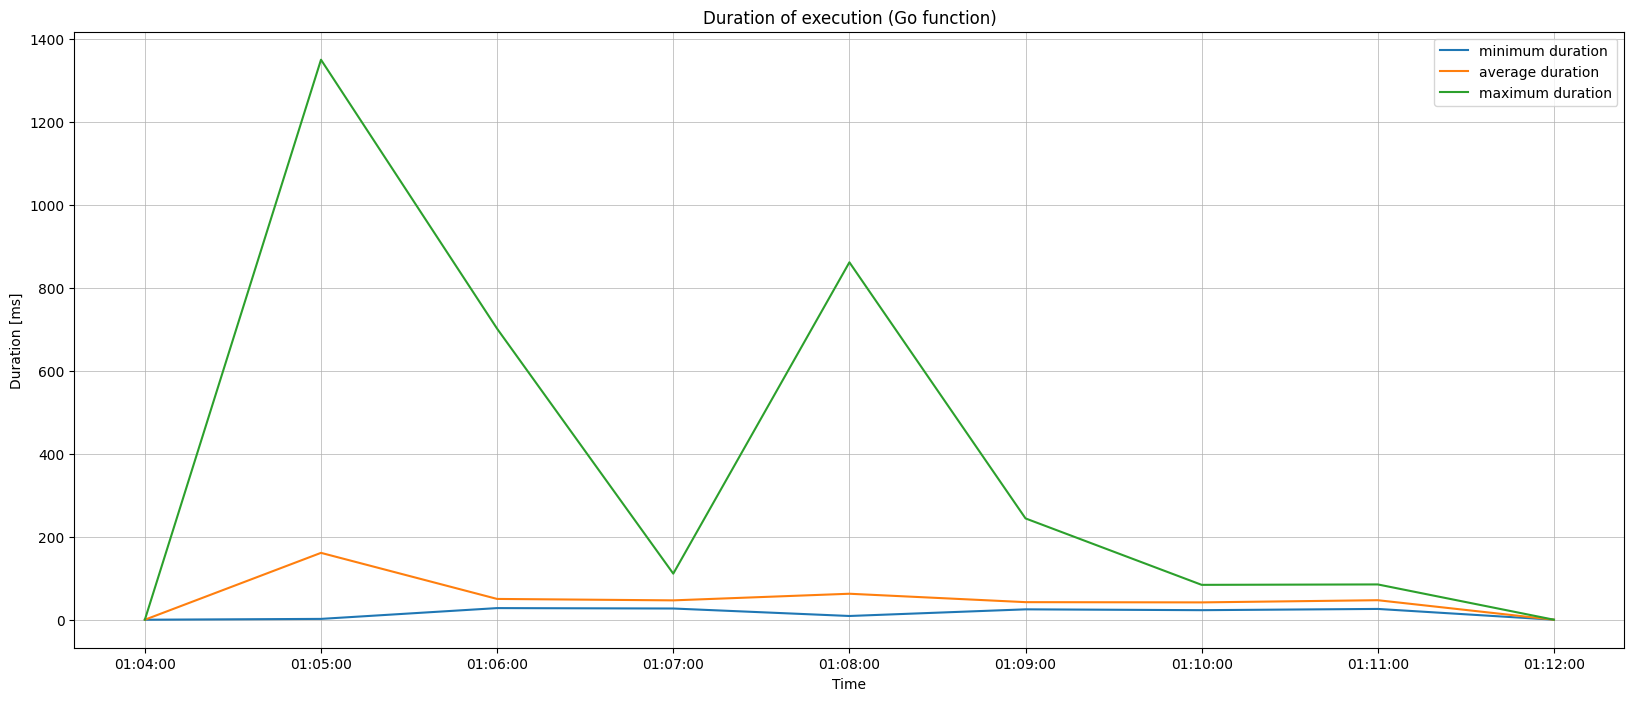

In [50]:
#plotting the durations

import matplotlib.pyplot as plt
import numpy as np

list1 = df1.iloc[:,0].tolist()

list2 = []
for x in list1:
    #list2.append(x.split(" "))
    list2.append(str(x.time()))

#list3 = []
#for x in list2:
#    list3.append(x[-1])

x = np.array(list2)

y = np.array (df2.iloc[:, 1].tolist())
y_min = []
for item in y:
    y_min.append(float(item)*1000)
y = np.array (df3.iloc[:, 1].tolist())
y_avg = [0]
for item in y:
    y_avg.append(float(item)*1000)
y_avg.append(0)
y = np.array (df4.iloc[:, 1].tolist())
y_max = []
for item in y:
    y_max.append(float(item)*1000)
y_max.pop(-1)


fig, ax = plt.subplots(figsize = (20,8)) 
ax.set_title("Duration of execution (Go function)")
ax.set_xlabel('Time')
ax.set_ylabel('Duration [ms]')
ax.plot(x, y_min, label = "minimum duration")
ax.plot(x, y_avg, label = "average duration")
ax.plot(x, y_max, label = "maximum duration")
ax.grid(True, linewidth=0.5)
plt.legend()
plt.show()

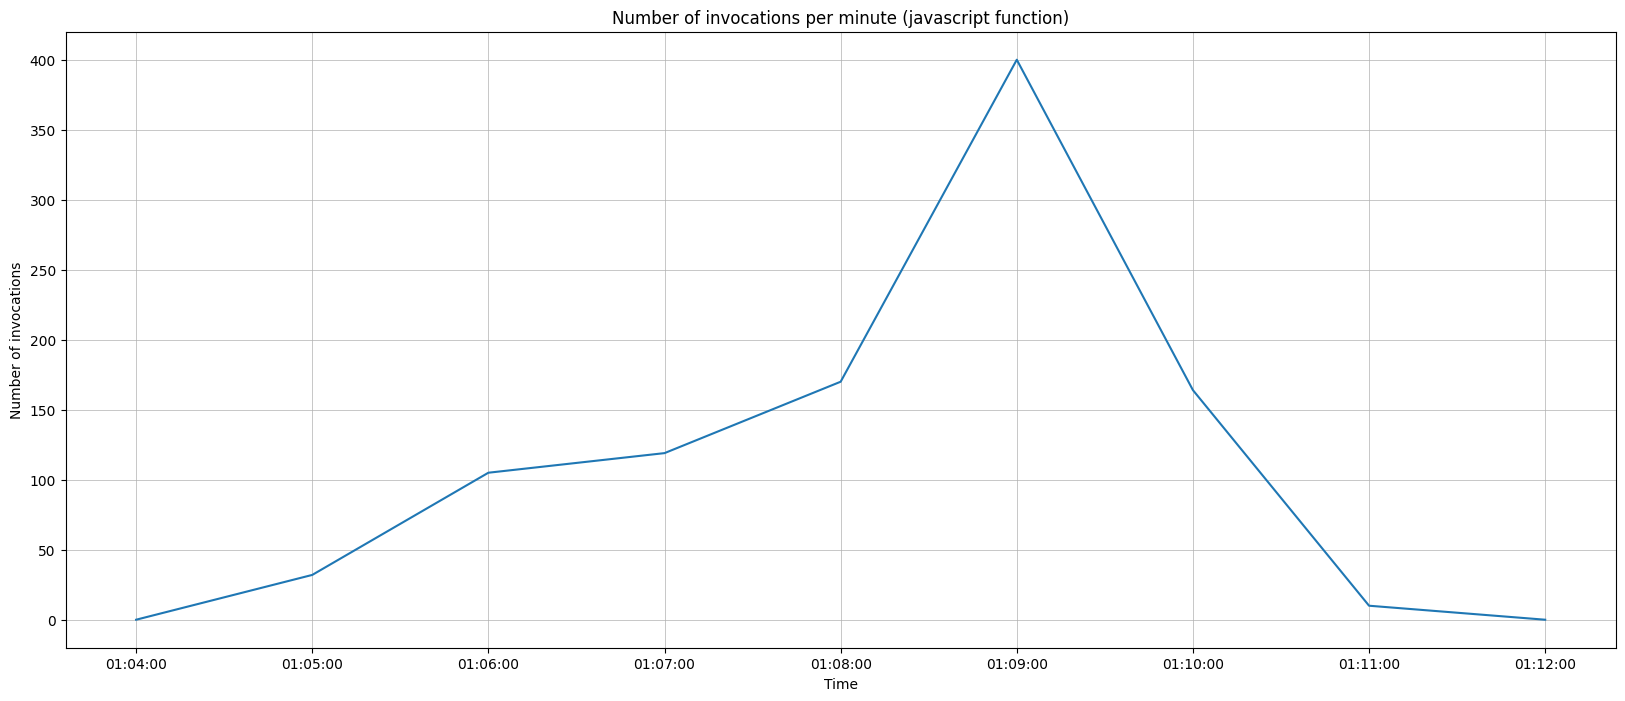

In [51]:
#plotting the invocations

import matplotlib.pyplot as plt
import numpy as np

list1 = df1.iloc[:,0].tolist()

list2 = []
for x in list1:
    #list2.append(x.split(" "))
    list2.append(str(x.time()))

#list3 = []
#for x in list2:
#    list3.append(x[-1])

x = np.array(list2)


y = np.array (df1.iloc[:, 1].tolist())
invocations = []
for item in y:
    invocations.append(int(item))

fig, ax = plt.subplots(figsize = (20,8)) 
ax.set_title("Number of invocations per minute (javascript function)")
ax.set_xlabel('Time')
ax.set_ylabel('Number of invocations')
ax.plot(x, invocations)
ax.grid(True, linewidth=0.5)
plt.show()